#Libraries

In [3]:
import pandas as pd
!pip install mplsoccer
import numpy as np 
import seaborn as sns
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch,add_image,PyPizza, FontManager
from matplotlib.colors import to_rgba
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
rcParams['text.color'] = 'black'
from mplsoccer import FontManager
import matplotlib.patheffects as path_effects
from PIL import Image
!pip install highlight_text
from highlight_text import ax_text
from urllib.request import urlopen
from matplotlib.cm import get_cmap
import os
from PIL import Image
from io import BytesIO
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 KB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Reading the data

**Tenho que copiar a este dicionário que sai no Jupyter (é o primeiro). Depois guardo o dicionário com o nome para a variável playerIdNameDictionary.**

**Exemplo de output**

{"playerIdNameDictionary":{"430413":"Nélson da Luz","351703":"André Silva","297541":"Nicolas Janvier","322790":"Bruno Gaspar","351604":"Jorge Fernandes","396579":"Celton Biai","408432":"André Amaro","412912":"Hélder Sá","107158":"Bruno Varela","437999":"Dani Silva","318502":"Mikel Villanueva","319796":"Michael Johnston","432629":"Ibrahima Bamba","431674":"Miguel Maga","444826":"Jota Silva","444828":"Matheus Índio","447235":"Afonso Freitas","454565":"Mamadou Tounkara","460211":"Gonçalo Nogueira","383185":"Safira","132273":"Wendell","338791":"Pepê Aquino","388685":"Gabriel Veron","351744":"Stephen Eustáquio","114301":"Mateus Uribe","358801":"Mehdi Taremi","373842":"Diogo Costa","395173":"João Mário","421893":"André Franco","422950":"Rodrigo Conceição","424768":"Gonçalo Borges","120608":"Otávio","10105":"Pepe","322683":"Cláudio Ramos","322771":"Fábio Cardoso","347204":"Galeno","244779":"Marko Grujic","280060":"Toni Martínez","28521":"Iván Marcano","342857":"Danny Namaso"}

In [107]:
df = pd.read_csv('result.csv')

In [108]:
playerIdNameDictionary = {"430413":"Nélson da Luz","351703":"André Silva","297541":"Nicolas Janvier","322790":"Bruno Gaspar","351604":"Jorge Fernandes","396579":"Celton Biai","408432":"André Amaro","412912":"Hélder Sá","107158":"Bruno Varela","437999":"Dani Silva","318502":"Mikel Villanueva","319796":"Michael Johnston","432629":"Ibrahima Bamba","431674":"Miguel Maga","444826":"Jota Silva","444828":"Matheus Índio","447235":"Afonso Freitas","454565":"Mamadou Tounkara","460211":"Gonçalo Nogueira","383185":"Safira","132273":"Wendell","338791":"Pepê Aquino","388685":"Gabriel Veron","351744":"Stephen Eustáquio","114301":"Mateus Uribe","358801":"Mehdi Taremi","373842":"Diogo Costa","395173":"João Mário","421893":"André Franco","422950":"Rodrigo Conceição","424768":"Gonçalo Borges","120608":"Otávio","10105":"Pepe","322683":"Cláudio Ramos","322771":"Fábio Cardoso","347204":"Galeno","244779":"Marko Grujic","280060":"Toni Martínez","28521":"Iván Marcano","342857":"Danny Namaso"}

In [109]:
playerIdNameDictionary = {float(k):v for k,v in playerIdNameDictionary.items()}

df['playerName'] = df['playerId'].map(playerIdNameDictionary)
df['relatedPlayerName'] =  df['relatedPlayerId'].map(playerIdNameDictionary)

df = df[['id', 'eventId', 'teamId', 'expandedMinute','x', 'y', 'period/value',
         'period/displayName', 'type/value', 'type/displayName',
         'outcomeType/value', 'outcomeType/displayName',
         'playerId', 'playerName', 'isTouch', 'endX', 'endY', 'relatedEventId',
         'relatedPlayerId','relatedPlayerName','blockedX', 'blockedY', 'isGoal', 'isShot']]




In [7]:
df1 = pd.read_csv('result.csv')
df1.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId', 'qualifiers/0/type/value',
       'qualifiers/0/type/displayName', 'qualifiers/0/value',
       'qualifiers/1/type/value', 'qualifiers/1/type/displayName',
       'qualifiers/1/value', 'qualifiers/2/type/value',
       'qualifiers/2/type/displayName', 'qualifiers/2/value',
       'qualifiers/3/type/value', 'qualifiers/3/type/displayName',
       'qualifiers/3/value', 'qualifiers/4/type/value',
       'qualifiers/4/type/displayName', 'qualifiers/4/value',
       'satisfiedEventsTypes/0', 'satisfiedEventsTypes/1',
       'satisfiedEventsTypes/2', 'satisfiedEventsTypes/3',
       'satisfiedEventsTypes/4', 'satisfiedEventsTypes/5',
       'satisfiedEventsTypes/6', 'endX', 'endY', 'qualifiers/5/type/value',
       'qualifiers/5/type/displayName', 'q

# Info about the data and how to interpreter the data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1507 non-null   int64  
 1   eventId                  1507 non-null   int64  
 2   teamId                   1507 non-null   int64  
 3   expandedMinute           1507 non-null   int64  
 4   x                        1507 non-null   float64
 5   y                        1507 non-null   float64
 6   period/value             1507 non-null   int64  
 7   period/displayName       1507 non-null   object 
 8   type/value               1507 non-null   int64  
 9   type/displayName         1507 non-null   object 
 10  outcomeType/value        1507 non-null   int64  
 11  outcomeType/displayName  1507 non-null   object 
 12  playerId                 1493 non-null   float64
 13  playerName               1493 non-null   object 
 14  isTouch                 

**Coordenadas x e y variam de 0 a 100**

In [26]:
df['y'].max()
#dx['y'].min()
#df['x'].max()
#dx['x'].min()

100.0

**Event type info**

In [10]:
df['type/displayName'].unique()

array(['Start', 'Pass', 'Dispossessed', 'Tackle', 'Interception',
       'BallRecovery', 'BlockedPass', 'BallTouch', 'KeeperPickup', 'Foul',
       'TakeOn', 'Clearance', 'OffsideGiven', 'OffsidePass',
       'OffsideProvoked', 'Aerial', 'CornerAwarded', 'SavedShot', 'Save',
       'Goal', 'Challenge', 'Error', 'ShotOnPost', 'MissedShots',
       'GoodSkill', 'Card', 'End', 'SubstitutionOff', 'SubstitutionOn',
       'FormationChange', 'ShieldBallOpp', 'Smother', 'FormationSet'],
      dtype=object)

In [8]:
df['type/value'].unique()

array([   32,     1,    50,     7,     8,    49,    74,    61,    52,
           4,     3,    12, 10000,     2,    55,    44,     6,    15,
          10,    16,    45,    51,    14,    13,    42,    17,    30,
          18,    19,    40,    56,    54,    34])

In [ ]:
df['eventId'].unique()

**Outcome info**

In [17]:
df['outcomeType/displayName'].unique()

array(['Successful', 'Unsuccessful'], dtype=object)

In [18]:
df['outcomeType/value'].unique()

array([1, 0])

**Minutes**

In [16]:
df['expandedMinute'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96])

**Period of the game**

In [12]:
df['period/displayName'].unique()

array(['FirstHalf', 'SecondHalf', 'PostGame', 'PreMatch'], dtype=object)

In [11]:
df['period/value'].unique()

array([ 1,  2, 14, 16])

**Blocked X e Y**

In [28]:
df['blockedX'].unique()
df['blockedY'].unique()

array([ nan, 54.7, 50.4, 48.7, 45.5, 47.8, 68.2, 46. , 49.1, 68.6, 50. ,
       64.3, 31.2, 54.9, 32.1])

**True or Null**

In [27]:
df['isGoal'].unique()
df['isShot'].unique()
df['isTouch'].unique()


array([nan, True], dtype=object)

**Como saber a que team ids corresponde uma equipa?**

In [54]:
df['teamId'].unique()

array([297, 107])

**Aquilo vou saber logo tendo conhecimento dos jogadores**

In [55]:
df[['playerName','teamId']].head(15)

,playerName,teamId
0,NaN,297
1,NaN,107
2,Otávio,297
3,Stephen Eustáquio,297
4,Jorge Fernandes,107
5,Michael Johnston,107
6,Michael Johnston,107
7,Wendell,297
8,Dani Silva,107
9,Michael Johnston,107


**Jogadores de uma equipa e de outra**

In [57]:
df[df['teamId']==297]['playerName'].unique()

array([nan, 'Otávio', 'Stephen Eustáquio', 'Wendell', 'Galeno', 'Pepe',
       'Mateus Uribe', 'Mehdi Taremi', 'Iván Marcano', 'João Mário',
       'Toni Martínez', 'Diogo Costa', 'Pepê Aquino', 'Marko Grujic',
       'Danny Namaso'], dtype=object)

In [58]:
df[df['teamId']==107]['playerName'].unique()

array([nan, 'Jorge Fernandes', 'Michael Johnston', 'Dani Silva',
       'Mikel Villanueva', 'Miguel Maga', 'André Silva', 'Jota Silva',
       'Bruno Varela', 'Nicolas Janvier', 'André Amaro', 'Afonso Freitas',
       'Ibrahima Bamba', 'Nélson da Luz', 'Safira', 'Gonçalo Nogueira'],
      dtype=object)

#Vizzes

#Heatmap geral

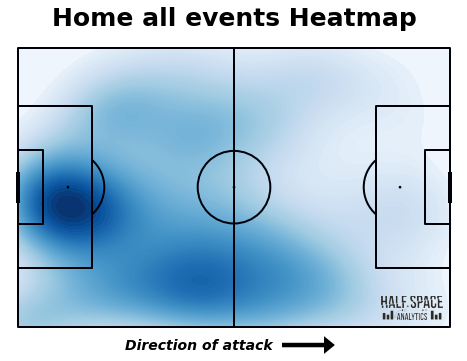

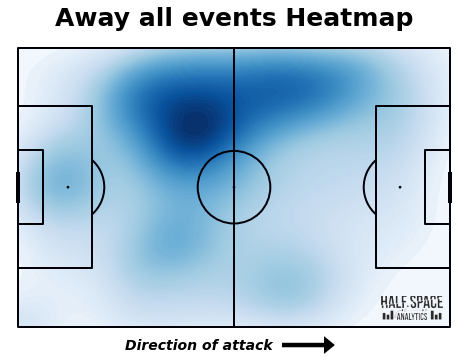

In [48]:
def team_heatmap_geral(team_id, cmap,title,df):
  df = df[df['teamId'] == team_id]
  pitch = Pitch(pitch_type = 'opta',line_color='#000009', line_zorder=2)
  fig, axs = pitch.draw(figsize=(6.6, 10.2))

  kde = pitch.kdeplot(df.x, df.y, ax=axs,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=cmap)
  plt.title(title,fontfamily='Helvetica',c='black',fontsize=25,fontweight='heavy',ha='center',va='bottom')
  ax2 = fig.add_axes([.81,.29,.13,.09])
  ax2.axis('off')
  img2 = Image.open('/content/Half Space Preto.png')
  ax2.imshow(img2)

  fig.text(x=.27,y=0.28,s='Direction of attack',fontstyle='italic',fontweight='heavy',fontsize=14,fontfamily='DejaVu Sans',color='black')
  ax3 = fig.add_axes([.6,.245,.11,.08])
  ax3.axis('off')
  img3 = Image.open('/content/arrow_right.png')
  ax3.imshow(img3)
  plt.savefig(title + '.png',dpi=500,bbox_inches = 'tight',facecolor='white')

team_heatmap_geral(107, 'Blues','Home all events Heatmap',df)
team_heatmap_geral(297, 'Blues','Away all events Heatmap',df)

# Heatmap open-play (event pass)

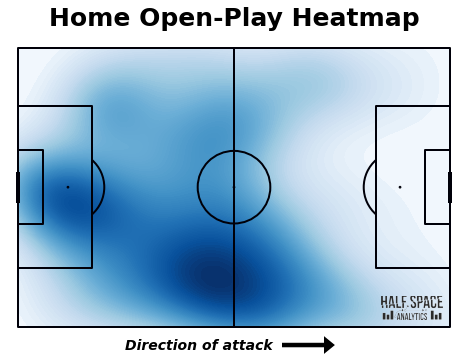

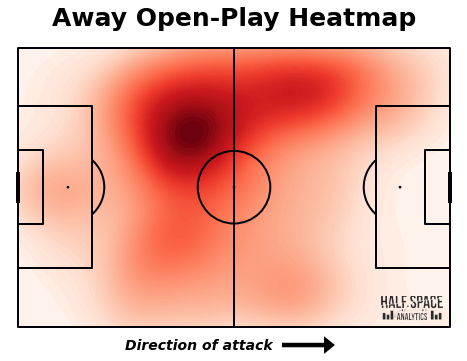

In [46]:
def team_heatmap_event(team_id, event_type, cmap,title,df):

  df = df[df['teamId'] == team_id]
  df = df[df['type/displayName'] == event_type]
  pitch = Pitch(pitch_type = 'opta',line_color='#000009', line_zorder=2)
  fig, axs = pitch.draw(figsize=(6.6, 10.2))

  kde = pitch.kdeplot(df.x, df.y, ax=axs,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=cmap)
  plt.title(title,fontfamily='Helvetica',c='black',fontsize=25,fontweight='heavy',ha='center',va='bottom')
  ax2 = fig.add_axes([.81,.29,.13,.09])
  ax2.axis('off')
  img2 = Image.open('/content/Half Space Preto.png')
  ax2.imshow(img2)

  fig.text(x=.27,y=0.28,s='Direction of attack',fontstyle='italic',fontweight='heavy',fontsize=14,fontfamily='DejaVu Sans',color='black')
  ax3 = fig.add_axes([.6,.245,.11,.08])
  ax3.axis('off')
  img3 = Image.open('/content/arrow_right.png')
  ax3.imshow(img3)
  plt.savefig(title + '.png',dpi=500,bbox_inches = 'tight',facecolor='white')

team_heatmap_event(107, 'Pass', 'Blues','Home Open-Play Heatmap',df)
team_heatmap_event(297, 'Pass', 'Reds','Away Open-Play Heatmap',df)

# heatmap ball recovery

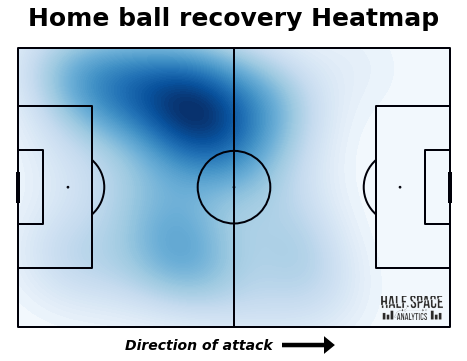

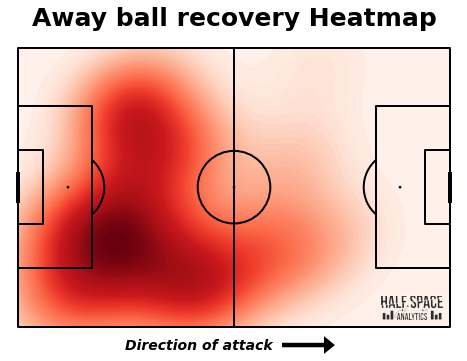

In [47]:
team_heatmap_event(297, 'BallRecovery', 'Blues','Home ball recovery Heatmap',df)
team_heatmap_event(107, 'BallRecovery', 'Reds','Away ball recovery Heatmap',df)

# voronoi

<ipython-input-49-11d827251eeb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team2['x'] = 100-df_team2['x']


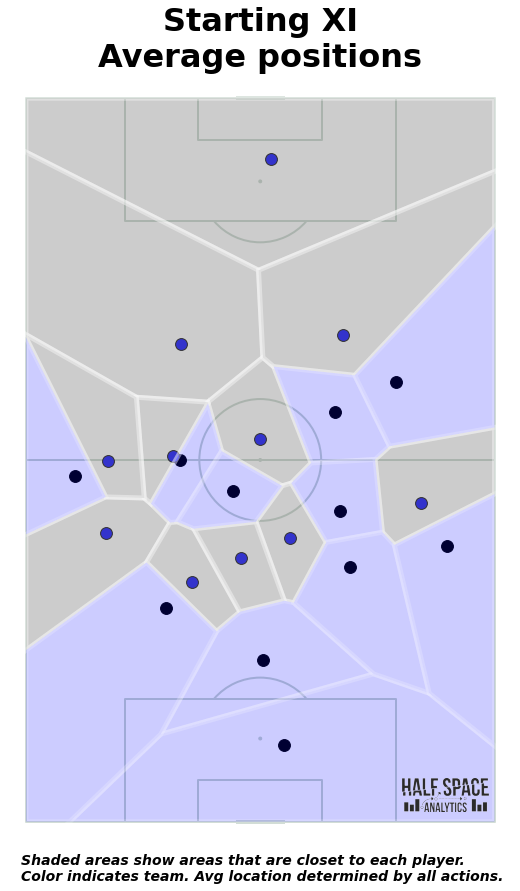

In [49]:
from matplotlib import font_manager

font_path = '/usr/share/fonts/truetype/open-sans/OpenSans-Regular.ttf'
font = font_manager.FontProperties(fname=font_path)

def voronoi_game(df,home_id, away_id, color_scatter_home, polygon_color_home,color_scatter_away, polygon_color_away):
  min_sub1 = df[(df['teamId'] == away_id) & (df['type/displayName']=='SubstitutionOff')]['expandedMinute'].values.min()
  min_sub1

  df_team1 = df[(df['teamId'] == away_id) & (df['expandedMinute'] < min_sub1) ]
  df_team1['playerName'].unique()

  team1_x = list(df_team1.groupby(['playerName']).mean()['x'])
  team1_y = list(df_team1.groupby(['playerName']).mean()['y'])
  team1 = list(np.zeros((11,),dtype=int)) #lista de zeros # coordenadadas de 11 jogadores

  ##########

  min_sub2 = df[(df['teamId'] == home_id) & (df['type/displayName']=='SubstitutionOff')]['expandedMinute'].values.min()
  min_sub2

  df_team2 = df[(df['teamId'] == home_id) & (df['expandedMinute'] < min_sub2) ]
  df_team2['playerName'].unique()
  df_team2['x'] = 100-df_team2['x']


  opp_x= list(df_team2.groupby(['playerName']).mean()['x'])
  opp_y= list(df_team2.groupby(['playerName']).mean()['y'])
  opp = list(np.ones((11,),dtype=int)) # lista de 1's #coordenadas de 11 jogadores do Betis

  ####

  df_vor = pd.DataFrame({
      'x':team1_x+opp_x,
      'y':team1_y+opp_y,
      'team':team1+opp
  })
  df_vor

  points=np.column_stack((df_vor.x,df_vor.y))
  points

  fig, ax = plt.subplots(figsize=(10,14))
  fig.set_facecolor('white')
  ax.patch.set_facecolor('white')


  pitch = VerticalPitch(pitch_type='opta',pitch_color='white', line_color='#c7d5cc')
  pitch.draw(ax=ax,figsize=(3.125, 4.5))

  x=df_vor.x
  y=df_vor.y
  team_1,team_2 = pitch.voronoi(x,y,df_vor.team)

  t1 = pitch.polygon(team_1, ax=ax, fc=polygon_color_away, ec='white', lw=5, alpha=0.4)
  t2 = pitch.polygon(team_2, ax=ax, fc=polygon_color_home, ec='white', lw=5, alpha=0.2)

  # Plot players
  for i in range(len(df_vor['x'])):
      if df_vor['team'][i]==0:
          pitch.scatter(df_vor['x'][i],df_vor['y'][i],ax=ax,color=color_scatter_away,s=140,edgecolors='black')
      if df_vor['team'][i]==1:
          pitch.scatter(df_vor['x'][i],df_vor['y'][i],ax=ax,color=color_scatter_home,s=140,edgecolors='black')
          
  plt.title('Starting XI\nAverage positions',fontfamily='Helvetica',c='black',fontsize=32,fontweight='heavy',ha='center',va='bottom')

  fig.text(x=.18,y=0.085,s='Shaded areas show areas that are closet to each player.\nColor indicates team. Avg location determined by all actions.',fontstyle='italic',fontweight='heavy',fontsize=14,fontfamily='DejaVu Sans',color='black')

  ax2 = fig.add_axes([.71,.13,.12,.08])
  ax2.axis('off')
  img2 = Image.open('/content/Half Space Preto.png')
  ax2.imshow(img2)
  plt.savefig('voronoi.png',dpi=500,bbox_inches = 'tight',facecolor='white')

voronoi_game(df,297,107,'blue','blue','black','grey')


In [133]:
df.head()

,id,eventId,teamId,expandedMinute,x,y,period/value,period/displayName,type/value,type/displayName,...,playerName,isTouch,endX,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,isGoal,isShot
0,2499449371,2,297,0,0.0,0.0,1,FirstHalf,32,Start,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2499449367,2,107,0,0.0,0.0,1,FirstHalf,32,Start,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2499449395,3,297,0,49.8,49.9,1,FirstHalf,1,Pass,...,Otávio,True,38.0,50.3,NaN,NaN,NaN,NaN,NaN,NaN
3,2499449409,4,297,0,46.2,51.6,1,FirstHalf,1,Pass,...,Stephen Eustáquio,True,84.9,74.5,NaN,NaN,NaN,NaN,NaN,NaN
4,2499449421,3,107,0,13.4,33.4,1,FirstHalf,12,Clearance,...,Jorge Fernandes,True,24.0,51.9,NaN,NaN,NaN,NaN,NaN,NaN


# passing network

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager, Sbopen

In [175]:
formation_dict = {'Diogo Costa': 'GK',
                  'João Mário': 'RB',
                  'Pepe': 'RCB',
                  'Iván Marcano': 'LCB',
                  'Wendell': 'LB',
                  'Galeno': 'LM',
                  'Otávio': 'RM',
                  'Mateus Uribe': 'CDM',
                  'Stephen Eustáquio': 'CM',
                  'Mehdi Taremi': 'CF',
                  'Toni Martínez': 'ST'}
df['position_abbreviation'] = df.playerName.map(formation_dict)


In [ ]:
df.head(20)[['playerName','position_abbreviation']]

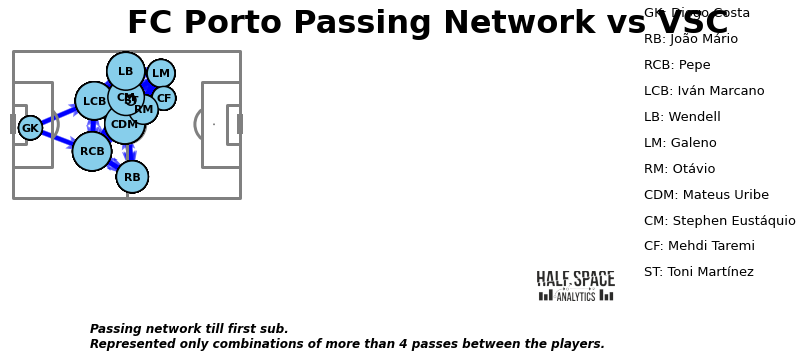

In [232]:
min_sub1 = df[(df['teamId'] == 297) & (df['type/displayName']=='SubstitutionOff')]['expandedMinute'].values.min()

df_team = df[(df['teamId'] == 297) & (df['expandedMinute'] < min_sub1)]
df_team = df_team[df_team['position_abbreviation'].isin(list(formation_dict.values()))]

df_pass = df_team[(df_team['type/displayName']=='Pass') & (df_team['outcomeType/displayName']=='Successful')]
# average locations

average_locs_and_count = (df_pass.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

df_pass.loc[:, 'passer'] = df_pass['playerId']
df_pass.loc[:, 'recipient'] = df_pass['playerId'].shift(-1)

df_pass.loc[:, 'passer'] = df_pass['passer'].map(playerIdNameDictionary)
df_pass.loc[:, 'recipient'] = df_pass['recipient'].map(playerIdNameDictionary)

#now we need to find the average locations and counts of the passes
average_locations = df_pass.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

pass_between = df_pass.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

# preciso de renomear o nome de umas colunas para o seguinte raciocínio
df_pass = df_pass.rename(columns={"endX": "x_end", "endY": "y_end"})

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

pass_between = pass_between[pass_between['pass_count']>3]

pitch = Pitch(pitch_type='opta',line_color='grey',pitch_color='white',linewidth=3)
fig, ax = pitch.draw(figsize=(10, 6))

for i,row in pass_between.reset_index().iterrows():
  arrows = pitch.arrows(pass_between.x,pass_between.y,pass_between.x_end,pass_between.y_end,
                     width = row.pass_count/2.5, headwidth = row.pass_count/5, color = 'blue', ax = ax, zorder = 0.1, alpha = 0.3)

for i,row in average_locations.reset_index().iterrows():
  nodes = pitch.scatter(average_locations.reset_index().x,average_locations.reset_index().y,color='skyblue',s=average_locations.reset_index()['count']*35, edgecolors='black', linewidth=1.5, alpha=1, ax=ax)

for i,row in average_locs_and_count.reset_index().iterrows():
  pitch.annotate(row.position_abbreviation, xy=(row.x, row.y), c='black', va='center', ha='center', fontweight = "bold", size=11, ax=ax, zorder = 3)

#fig.suptitle("Rede de Passes & Posição média", fontsize = 17,fontweight='heavy')
plt.title('FC Porto Passing Network vs VSC',fontfamily='Helvetica',c='black',fontsize=32,fontweight='heavy',ha='center',va='bottom')

fig.text(x=.13,y=-0.015,s='Passing network till first sub.\nRepresented only combinations of more than 4 passes between the players.',fontstyle='italic',fontweight='heavy',fontsize=12,fontfamily='DejaVu Sans',color='black')

ax2 = fig.add_axes([.75,.09,.11,.07])
ax2.axis('off')
img2 = Image.open('/content/Half Space Preto.png')
ax2.imshow(img2)

z=0.75
for key, value in formation_dict.items():
    fig.text(0.9, z, value + ': ' + key,fontsize=13,color='black',fontfamily='Helvetica',fontweight='normal')
    z -= 0.06
plt.savefig('pass_network.png',dpi=500,bbox_inches = 'tight',facecolor='white')




In [181]:
average_locations

,x,y,count
passer,,,
Diogo Costa,7.662500,47.606250,16
Galeno,65.159091,84.672727,22
Iván Marcano,35.775610,66.029268,41
João Mário,52.537931,14.351724,29
Mateus Uribe,49.221739,50.369565,46
Mehdi Taremi,66.387500,67.725000,16
Otávio,57.372000,60.080000,25
Pepe,34.774419,31.611628,43
Stephen Eustáquio,49.776316,68.421053,38


In [143]:
pass_between.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 82
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   passer      34 non-null     object 
 1   recipient   34 non-null     object 
 2   pass_count  34 non-null     int64  
 3   x           34 non-null     float64
 4   y           34 non-null     float64
 5   count       34 non-null     int64  
 6   x_end       34 non-null     float64
 7   y_end       34 non-null     float64
 8   count_end   34 non-null     int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 2.7+ KB


In [125]:
df_pass['passer'] = df_pass['playerId']
df_pass['recipient'] = df_pass['playerId'].shift(-1)

df_pass['passer'] = df_pass['passer'].map(playerIdNameDictionary)
df_pass['recipient'] = df_pass['recipient'].map(playerIdNameDictionary)

#now we need to find the number of passes between each player
pass_between = df_pass.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)



<ipython-input-125-03e69a05c851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['passer'] = df_pass['playerId']
<ipython-input-125-03e69a05c851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['recipient'] = df_pass['playerId'].shift(-1)
<ipython-input-125-03e69a05c851>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [129]:
#now we need to find the number of passes between each player
pass_between = df_pass.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

pass_between.head()

,passer,recipient,pass_count
0,Diogo Costa,Iván Marcano,6
1,Diogo Costa,Mateus Uribe,3
2,Diogo Costa,Mehdi Taremi,1
3,Diogo Costa,Otávio,1
4,Diogo Costa,Pepe,4


In [161]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,Diogo Costa,Iván Marcano,6,7.662500,47.606250,16,35.775610,66.029268,41
33,Mateus Uribe,Iván Marcano,7,49.221739,50.369565,46,35.775610,66.029268,41
52,Otávio,Iván Marcano,4,57.372000,60.080000,25,35.775610,66.029268,41
62,Pepe,Iván Marcano,9,34.774419,31.611628,43,35.775610,66.029268,41
83,Wendell,Iván Marcano,8,49.670732,86.090244,41,35.775610,66.029268,41
17,Iván Marcano,Mateus Uribe,5,35.775610,66.029268,41,49.221739,50.369565,46
27,João Mário,Mateus Uribe,13,52.537931,14.351724,29,49.221739,50.369565,46
64,Pepe,Mateus Uribe,8,34.774419,31.611628,43,49.221739,50.369565,46
85,Wendell,Mateus Uribe,8,49.670732,86.090244,41,49.221739,50.369565,46
36,Mateus Uribe,Mehdi Taremi,4,49.221739,50.369565,46,66.387500,67.725000,16
